In [2]:
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('UCI_Credit_Card.csv')
print(data.shape)
print(data.describe())

(30000, 25)
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904  

In [13]:
next_month = data['default.payment.next.month'].value_counts()
print(next_month) #chek the default and no-default quantity for next month

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


In [21]:
df = pd.DataFrame({'default.payment.next.month':next_month.index,'values': next_month.values})
df

,default.payment.next.month,values
0,0,23364
1,1,6636


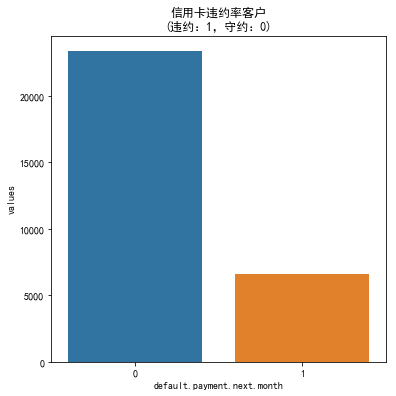

In [33]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize = (6,6))
plt.title("信用卡违约率客户\n(违约：1，守约：0)")
sns.set_color_codes('pastel')
sns.barplot(x='default.payment.next.month', y='values', data=df)
locs, labels = plt.xticks()
plt.show()

In [35]:
data.drop(['ID'], inplace=True, axis = 1)

In [46]:
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

In [60]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.3, stratify=target, random_state=1)

In [61]:
train_x

array([[5.000e+04, 2.000e+00, 2.000e+00, ..., 3.263e+03, 0.000e+00,
        0.000e+00],
       [2.500e+05, 1.000e+00, 1.000e+00, ..., 6.049e+03, 1.700e+01,
        4.980e+03],
       [1.000e+05, 2.000e+00, 1.000e+00, ..., 4.000e+03, 2.000e+03,
        0.000e+00],
       ...,
       [2.600e+05, 2.000e+00, 2.000e+00, ..., 7.503e+03, 7.502e+03,
        7.500e+03],
       [2.000e+04, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        4.000e+03],
       [1.000e+05, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [75]:
# struct each classifier
classifiers = [SVC(random_state = 1, kernel = 'rbf'),
              DecisionTreeClassifier(random_state=1, criterion='gini'),
              RandomForestClassifier(random_state=1, criterion='gini'),
              KNeighborsClassifier(metric='minkowski')]
classifier_names = ['svc', 'decisiontreeclassifier','randomforestclassifier',
                    'kneighborsclassifier']
classifier_param_grid = [{'svc__C':[1], 'svc__gamma':[0.01]},
                         {'decisiontreeclassifier__max_depth':[6,9,11]},
                         {'randomforestclassifier__n_estimators':[3,5,6]},
                         {'kneighborsclassifier__n_neighbors':[4,6,8]}]

In [76]:
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score='accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch 最优参数：", search.best_params_)
    print("GridSearch 最优分数：%0.4lf" % search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" % accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response
    

In [78]:
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        (model_name, model)
                        ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')

d:\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch 最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch 最优分数：0.8174
准确率 0.8172


d:\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch 最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch 最优分数：0.8186
准确率 0.8113


d:\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch 最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch 最优分数：0.7998
准确率 0.7994


d:\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch 最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch 最优分数：0.8040
准确率 0.8036
